In [1]:
cd ..

C:\Users\thinh\Documents\TN-Vathes\MAP\map-ephys


In [2]:
import pandas as pd
from pynwb import NWBHDF5IO
import numpy as np
import matplotlib.pyplot as plt

# Extract and plot drift metric values from NWB file

In [32]:
io = NWBHDF5IO(r"C:\Users\thinh\Downloads\sub-442571_ses-20190301T140324_behavior+ecephys+ogen.nwb", mode="r")
nwbfile = io.read()

In [33]:
trials_df = nwbfile.trials.to_dataframe()
units_df = nwbfile.units.to_dataframe()

In [36]:
nwbfile.electrode_groups.keys()

dict_keys(['17131309211 1-301', '17216703352 1-301', '18005107812 1-384', '18005107871 1-384'])

In [37]:
insertion_4 = '18005107871 1-384'
insert4_units = units_df[units_df.electrode_group == nwbfile.electrode_groups[insertion_4]]

In [40]:
insert4_units

,unit,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,drift_metric,...,velocity_above,velocity_below,classification,anno_name,spike_times,obs_intervals,electrodes,electrode_group,waveform_mean,waveform_sd
id,,,,,,,,,,,,,,,,,,,,,
1264,0,30000,multi,11.0,20.0,165.705293,3.710033,0.159468,16.338100,0.021277,...,0.686776,0.000000,unlabelled,,"[-0.4940151569987248, -0.43688107457408876, -0...","[[0.0, 5.1839], [7.332, 12.3457], [14.1719, 19...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[1.8138168036998974, 2.23535457348407, 3.19646...",[nan]
1265,1,30000,multi,27.0,40.0,143.399235,2.961019,0.000000,0.077168,0.000000,...,1.018160,0.343388,unlabelled,,"[272.5424056037623, 280.27921881469115, 285.93...","[[0.0, 5.1839], [7.332, 12.3457], [14.1719, 19...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[7.987882653061225, 8.97640306122449, 10.37946...",[nan]
1266,2,30000,multi,27.0,40.0,116.642508,2.403366,1.000000,1.306610,0.085106,...,0.730121,1.030160,unlabelled,,"[0.20842738613684064, 0.23606108177862772, 1.7...","[[0.0, 5.1839], [7.332, 12.3457], [14.1719, 19...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[8.705760542168674, 9.753388554216867, 10.3548...",[nan]
1267,3,30000,multi,43.0,60.0,125.542279,2.909440,0.000000,0.044621,1.000000,...,-0.875451,0.137355,unlabelled,,"[117.93945326518724, 220.17941024122317, 238.7...","[[0.0, 5.1839], [7.332, 12.3457], [14.1719, 19...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[6.893382352941177, 8.602941176470589, 9.54044...",[nan]
1268,4,30000,multi,43.0,60.0,122.722356,2.518473,1.000000,0.068244,0.000000,...,0.867904,0.137355,unlabelled,,"[4.264513899271124, 26.369207491787115, 44.963...","[[0.0, 5.1839], [7.332, 12.3457], [14.1719, 19...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[10.510817307692307, 13.44951923076923, 15.685...",[nan]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,331,30000,multi,43.0,2700.0,101.917614,2.824608,0.000000,0.017323,1.000000,...,1.371200,-0.194587,unlabelled,,"[39.44904085440231, 44.55699956077202, 45.5769...","[[0.0, 5.1839], [7.332, 12.3457], [14.1719, 19...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[-3.5511363636363638, -3.5511363636363638, -0....",[nan]
1588,332,30000,multi,59.0,3000.0,106.870404,2.970519,1.000000,0.107090,0.000000,...,1.030160,-4.326690,unlabelled,,"[0.18359372720664568, 0.2437278489651309, 0.78...","[[0.0, 5.1839], [7.332, 12.3457], [14.1719, 19...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[3.5156250000000004, 3.2513786764705883, 3.963...",[nan]
1589,333,30000,multi,59.0,3400.0,76.960725,2.590645,1.000000,0.808953,0.000000,...,0.526528,-2.740240,unlabelled,,"[0.4163634457429555, 2.444390035424909, 3.9143...","[[0.0, 5.1839], [7.332, 12.3457], [14.1719, 19...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[5.198200389105058, 5.1434824902723735, 4.9641...",[nan]


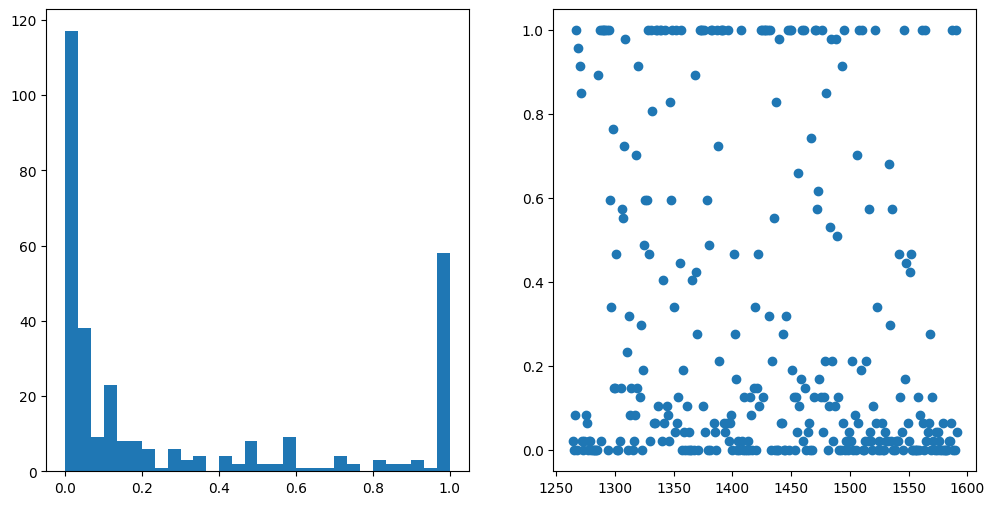

In [41]:
fig, axes = plt.subplots(1,2, figsize=(12, 6))
axes[0].hist(insert4_units.drift_metric, 30);
axes[1].plot(insert4_units.drift_metric, 'o');

# Extract and plot drift metric values from DJ pipeline

In [3]:
import datajoint as dj
from pipeline import lab, experiment, ephys

[2023-07-20 17:29:13,154][INFO]: Connecting thinh@datajoint.mesoscale-activity-map.org:3306
[2023-07-20 17:29:13,786][INFO]: Connected thinh@datajoint.mesoscale-activity-map.org:3306


In [4]:
skey = (experiment.Session & {'subject_id': 442571, 'session': 3}).fetch1('KEY')
experiment.Session & skey

subject_id institution 6 digit animal ID,session session number,session_date,session_time,username,rig
442571,3,2019-03-01,14:03:24,susu,RRig2


In [5]:
ephys.ProbeInsertion * ephys.ProbeInsertion.RecordableBrainRegion & skey

subject_id institution 6 digit animal ID,session session number,insertion_number,brain_area,hemisphere,probe unique identifier for this model of probe (e.g. part number),probe_type e.g. neuropixels_1.0,electrode_config_name user friendly name
442571,3,1,ALM,left,17216703352,neuropixels 1.0 - 3B,1-301
442571,3,2,ALM,right,17131309211,neuropixels 1.0 - 3B,1-301
442571,3,3,Striatum,left,18005107812,neuropixels 1.0 - 3B,1-384
442571,3,4,Striatum,right,18005107871,neuropixels 1.0 - 3B,1-384


In [6]:
insertion_key = {**skey, 'insertion_number': 4}
ephys.MAPClusterMetric.DriftMetric & insertion_key

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,unit,drift_metric
442571,3,4,kilosort2,0,0.0212766
442571,3,4,kilosort2,1,0.0
442571,3,4,kilosort2,2,0.0851064
442571,3,4,kilosort2,3,1.0
442571,3,4,kilosort2,4,0.0
442571,3,4,kilosort2,5,0.957447
442571,3,4,kilosort2,6,0.914894


In [42]:
fetched_drift_metrics = (ephys.MAPClusterMetric.DriftMetric & insertion_key).fetch('drift_metric', order_by='unit')
fetched_drift_metrics

array([0.0212766, 0.       , 0.0851064, 1.       , 0.       , 0.957447 ,
       0.914894 , 0.851064 , 0.0212766, 0.       , 0.0212766, 0.0851064,
       0.0638298, 0.       , 0.0212766, 0.0212766, 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.893617 , 1.       ,
       0.0212766, 1.       , 1.       , 1.       , 1.       , 1.       ,
       0.       , 1.       , 0.595745 , 0.340426 , 0.765957 , 0.148936 ,
       0.148936 , 0.468085 , 0.       , 0.       , 0.0212766, 0.148936 ,
       0.574468 , 0.553191 , 0.723404 , 0.978723 , 0.234043 , 0.       ,
       0.319149 , 0.0851064, 0.148936 , 0.       , 0.0212766, 0.0851064,
       0.702128 , 0.148936 , 0.914894 , 0.12766  , 0.297872 , 0.       ,
       0.191489 , 0.489362 , 0.595745 , 0.595745 , 1.       , 0.468085 ,
       0.0212766, 1.       , 0.808511 , 0.0638298, 0.0638298, 1.       ,
       1.       , 0.106383 , 1.       , 1.       , 0.0212766, 0.404255 ,
       0.0638298, 1.       , 0.106383 , 0.0851064, 

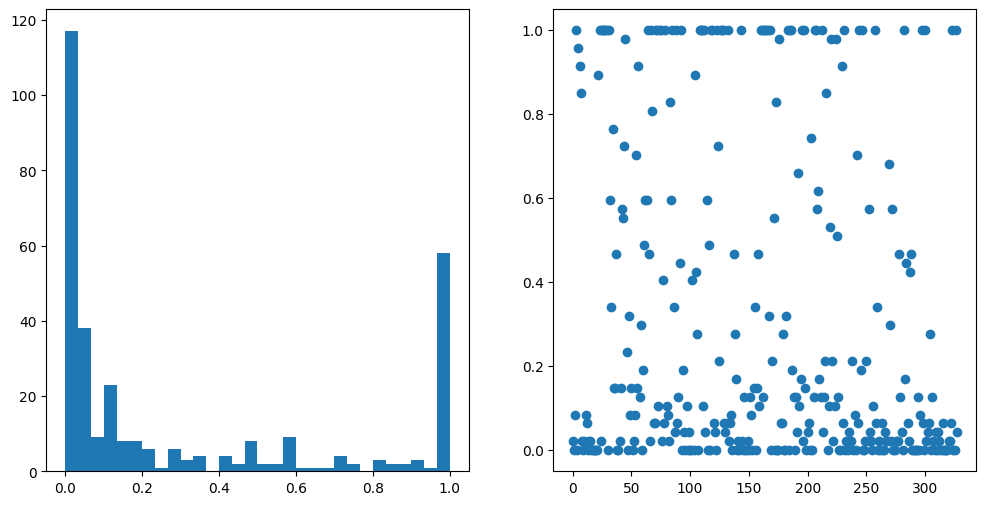

In [44]:
fig, axes = plt.subplots(1,2, figsize=(12, 6))
axes[0].hist(fetched_drift_metrics, 30);
axes[1].plot(fetched_drift_metrics, 'o');

## Recompute from drift metric code

In [24]:
from scipy.stats import poisson

def compute_unit_drift_metric(key):
    # this is basically a copy & paste of this `make` function here 
    # https://github.com/mesoscale-activity-map/map-ephys/blob/534ea498df9b7e3b17b8f9e0284e31e0c71d966a/pipeline/ephys.py#L667
    if (ephys.ProbeInsertionQuality & key) and (ephys.ProbeInsertionQuality.GoodTrial & key):
        trial_spikes_query = (
            ephys.Unit.TrialSpikes
            * (experiment.TrialEvent & 'trial_event_type = "trialend"')
            & ProbeInsertionQuality.GoodTrial
            & key)
    else:
        trial_spikes_query = (
            ephys.Unit.TrialSpikes
            * (experiment.TrialEvent & 'trial_event_type = "trialend"')
            & key)

    trial_spikes, trial_durations = trial_spikes_query.fetch(
        'spike_times', 'trial_event_time', order_by='trial')

    # -- compute trial spike-rates
    trial_spike_rates = [len(s) for s in trial_spikes] / trial_durations.astype(float)  # spikes/sec
    mean_spike_rate = np.mean(trial_spike_rates)
    # -- moving-average
    window_size = 6  # sample
    kernel = np.ones(window_size) / window_size
    processed_trial_spike_rates = np.convolve(trial_spike_rates, kernel, 'same')
    # -- down-sample
    ds_factor = 6
    processed_trial_spike_rates = processed_trial_spike_rates[::ds_factor]
    # -- compute drift_qc from poisson distribution
    poisson_cdf = poisson.cdf(processed_trial_spike_rates, mean_spike_rate)
    instability = np.logical_or(poisson_cdf > 0.95, poisson_cdf < 0.05).sum() / len(poisson_cdf)
    return instability


In [45]:
computed_drift_metrics = {tuple(unit_key.values()): compute_unit_drift_metric(unit_key)
                          for unit_key in (ephys.Unit & insertion_key).fetch('KEY')}

In [55]:
computed_drift_metrics

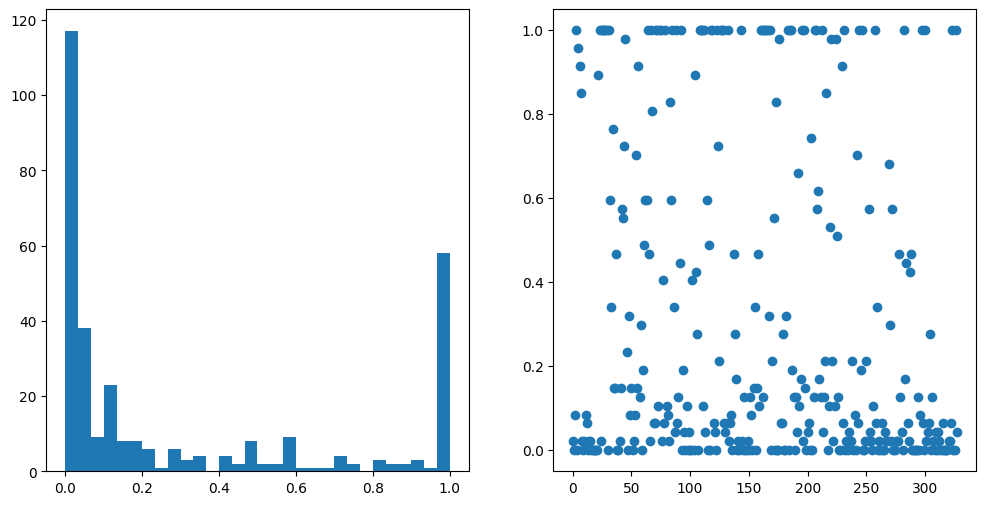

In [47]:
fig, axes = plt.subplots(1,2, figsize=(12, 6))
axes[0].hist(computed_drift_metrics.values(), 30);
axes[1].plot(computed_drift_metrics.values(), 'o');

# Plot all three together

Text(0.5, 1.0, 'DJ fetch vs. DJ recomputed')

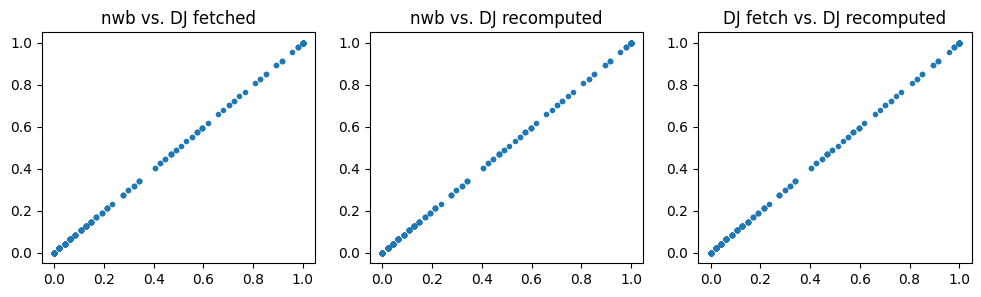

In [57]:
fig, axes = plt.subplots(1,3, figsize=(12, 3))

axes[0].plot(insert4_units.drift_metric, fetched_drift_metrics, '.');
axes[0].set_title('nwb vs. DJ fetched')
axes[1].plot(insert4_units.drift_metric, computed_drift_metrics.values(), '.');
axes[1].set_title('nwb vs. DJ recomputed')
axes[2].plot(fetched_drift_metrics, computed_drift_metrics.values(), '.');
axes[2].set_title('DJ fetch vs. DJ recomputed')